In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [91]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import recall_score

In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress all UserWarnings and ConvergenceWarnings - just for readability, I know a convergence warning is a genuine issue I should fix
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# <!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I have chosen to use the Default of Credit Card Clients Dataset that contains data on the default payments of credit card clients in Taiwan from 2005. This dataset appears to contain sequential data of client bill totals and payment amounts, so I believe finding the most important features for prediction will be a struggle, as it makes sense to think that sequences of activity are more useful to us when predicting default (such as a customer racking up large credit with little ability to repay) rather than their activity in one particular month. Finding particularly which months of activity or sequences of activity leading up to the default are most indicative of the failure to pay will be a challenging task. 

In [4]:
credit = pd.read_csv('data/UCI_Credit_Card.csv')
credit.rename(columns={'PAY_0': 'PAY_1'}, inplace=True) # renaming PAY_0 to be PAY_1 as it corresponds to the first month of data collection
credit_X = credit.drop(columns = 'default.payment.next.month')
credit_y = credit['default.payment.next.month']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
random_state = 123
X_train, X_test, y_train, y_test = train_test_split(credit_X, credit_y, test_size = 0.3, random_state=random_state)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10


I first visualize the repayment statuses of customers on the first month of data collection and on the last month of data collection. There appears to be no major difference in the distribution of these repayment statuses.

Second, I make the same visualization but for customers who defaulted only, to see if this any new patterns emerge. It appears that the majority of defaulting customers do not duly pay their bills - most are on some form of delayed repayment status. It doesn't appear that this changes significantly in the month prior to defaulting from the start of data collection.

Thirdly, I visualize the proportion of the two binary classes (default or non-default) in the overall dataset, as well as in the training and test sets individually, and provide the summary statistics below. I first want to ensure that the splits in each set are representative of the overall data set. I also want to get a sense for how representative our accuracy may or may not be of our model's performance when it comes to recognizing the default class. It appears according to my summary statistics that the positive class is accurately represented across all splits and accounts for about 22% of the data.

The next summary statistic I calculate is the summary of the credit card balance column, converted to CAD for better interpretability. This allows me to see the range of credit allowances the customers in our dataset are working with and better understand the credit card customer demographic.

Here, it seems that, because the positive class (default) makes up only about 20% of the observations, using a metric like recall may be best to optimize our model. Using recall will allow us to crack down on false negatives. We want to avoid false negatives over false positives in default detection, as it is less destructive to be stringent on default-indicative activity than to let a customer slip through the cracks and default.

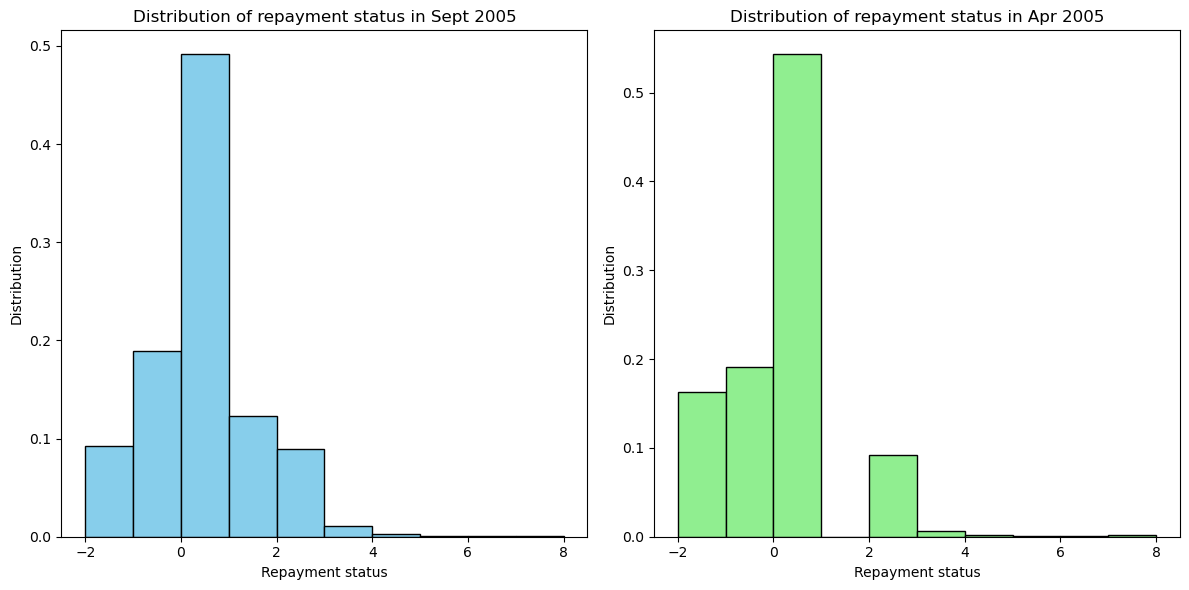

In [6]:
# Understanding distribution of re-payment status in the first month, Sept 2005, vs the last month, Apr 2005


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First bar chart
ax1.hist(credit['PAY_1'], density=True, color='skyblue', edgecolor='black')
ax1.set_title("Distribution of repayment status in Sept 2005")
ax1.set_xlabel("Repayment status")
ax1.set_ylabel('Distribution')

# Second bar chart
ax2.hist(credit['PAY_6'], density=True, color='lightgreen', edgecolor='black')
ax2.set_title("Distribution of repayment status in Apr 2005")
ax2.set_xlabel("Repayment status")
ax2.set_ylabel('Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

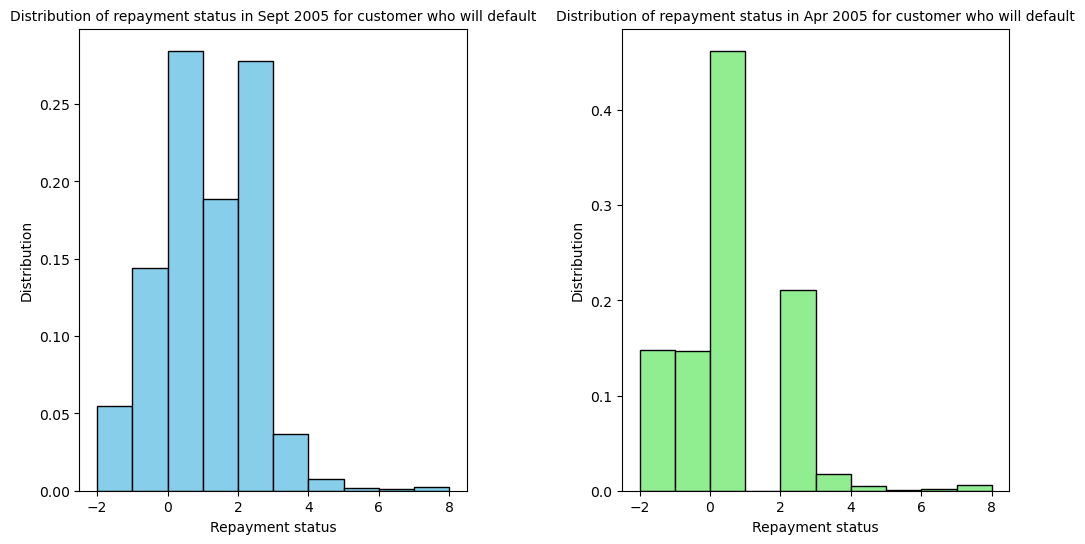

In [7]:
# Understanding same repayment status distribution but solely for customers who defaulted 

default_credit = credit[credit['default.payment.next.month'] == 1]


# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# First bar chart
ax1.hist(default_credit['PAY_1'], density=True, color='skyblue', edgecolor='black')
ax1.set_title("Distribution of repayment status in Sept 2005 for customer who will default", fontsize=10)
ax1.set_xlabel("Repayment status")
ax1.set_ylabel('Distribution')

# Second bar chart
ax2.hist(default_credit['PAY_6'], density=True, color='lightgreen', edgecolor='black')
ax2.set_title("Distribution of repayment status in Apr 2005 for customer who will default", fontsize=10)
ax2.set_xlabel("Repayment status")
ax2.set_ylabel('Distribution')

plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()

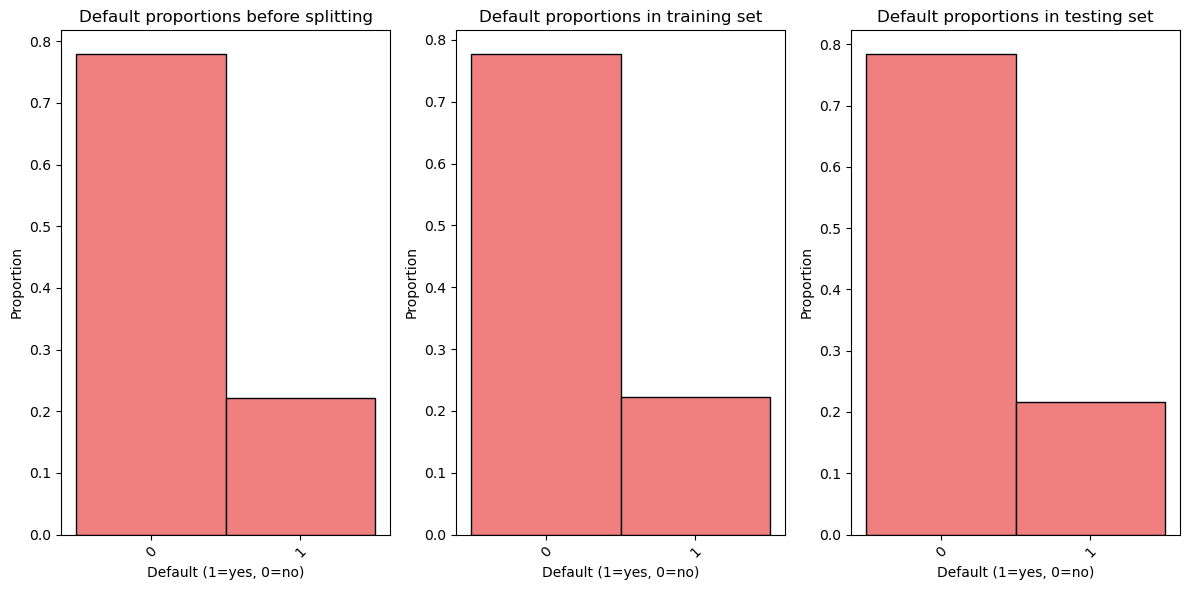

In [8]:
# Understanding the proportions of default in the overall data set, before train and test split, and after


# Calculate the number of samples in each dataset
total_credit_y = len(credit_y)
total_y_train = len(y_train)
total_y_test = len(y_test)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Before split
counts1, bins1, patches1 = ax1.hist(credit_y, bins=2, color='lightcoral', edgecolor='black')
proportions1 = counts1 / total_credit_y  # Convert counts to proportions
ax1.clear()
ax1.bar(bins1[:-1], proportions1, width=np.diff(bins1), align="edge", color='lightcoral', edgecolor='black')
ax1.set_title("Default proportions before splitting")
ax1.set_xlabel("Default (1=yes, 0=no)")
ax1.set_ylabel("Proportion")
ax1.set_xticks([0.25, 0.75])
ax1.set_xticklabels([0, 1], rotation=45)

# After split (train)
counts2, bins2, patches2 = ax2.hist(y_train, bins=2, color='lightcoral', edgecolor='black')
proportions2 = counts2 / total_y_train  # Convert counts to proportions
ax2.clear()
ax2.bar(bins2[:-1], proportions2, width=np.diff(bins2), align="edge", color='lightcoral', edgecolor='black')
ax2.set_title("Default proportions in training set")
ax2.set_xlabel("Default (1=yes, 0=no)")
ax2.set_ylabel("Proportion")
ax2.set_xticks([0.25, 0.75])
ax2.set_xticklabels([0, 1], rotation=45)

# After split (test)
counts3, bins3, patches3 = ax3.hist(y_test, bins=2, color='lightcoral', edgecolor='black')
proportions3 = counts3 / total_y_test  # Convert counts to proportions
ax3.clear()
ax3.bar(bins3[:-1], proportions3, width=np.diff(bins3), align="edge", color='lightcoral', edgecolor='black')
ax3.set_title("Default proportions in testing set")
ax3.set_xlabel("Default (1=yes, 0=no)")
ax3.set_ylabel("Proportion")
ax3.set_xticks([0.25, 0.75])
ax3.set_xticklabels([0, 1], rotation=45)

plt.tight_layout()
plt.show()

In [9]:
# Displaying calculations of proportion of default for each set of data (done previously)

print(f"The proportion of default:\n In the overall data set is {round(proportions1[1], 3)},\n in the train set is {round(proportions2[1], 3)},\n and in the test set is {round(proportions3[1], 3)}")

The proportion of default:
 In the overall data set is 0.221,
 in the train set is 0.223,
 and in the test set is 0.216


In [10]:
# Getting summary statistics on the distribution of credit card balances in this dataset, switching from New Taiwan dollars to CAD

cad_balances = credit['LIMIT_BAL'] * 0.043
sum_stats = cad_balances.describe()

print(sum_stats)

count    30000.000000
mean      7201.825875
std       5579.149447
min        430.000000
25%       2150.000000
50%       6020.000000
75%      10320.000000
max      43000.000000
Name: LIMIT_BAL, dtype: float64


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

Because this data set contains sequential data (or time series data), it is highly probable that these time series data columns are high correlated with one another. In this sense, it makes sense to reduce multi-colinearity and noise as much as possible. By taking an average , I will do this with the repayment status columns to find a customer's average repayment status. Additionally, it may be helpful to create two new features - one being the customer's monthly average credit utilization rate over the data collection period and another being the ratio of total debt to total payments made over the time period.




In [11]:
X_train['total_debt'] = 0 # initializing new column
for n in np.arange(1, 7, 1):
    X_train['total_debt'] += X_train[f'BILL_AMT{n}']

X_train['total_payments'] = 0 # initializing new column
for n in np.arange(1, 7, 1):
    X_train['total_payments'] += X_train[f'PAY_AMT{n}']

X_train['utilization_rate'] = X_train['total_debt']/6 / X_train['LIMIT_BAL'] # monthly credit utilization rate: avg monthly credit usage divided by credit limit - typically those with strong credit have no more than a 30% util. rate

X_train['total_debt_payment_ratio'] = X_train['total_debt'] / X_train['total_payments']

X_train = X_train.drop(columns = ['total_debt', 'total_payments'])

In [12]:
# applying the same features to the test set

X_test['total_debt'] = 0 # initializing new column
for n in np.arange(1, 7, 1):
    X_test['total_debt'] += X_test[f'BILL_AMT{n}']

X_test['total_payments'] = 0 # initializing new column
for n in np.arange(1, 7, 1):
    X_test['total_payments'] += X_test[f'PAY_AMT{n}']

X_test['utilization_rate'] = X_test['total_debt']/6 / X_test['LIMIT_BAL'] # monthly credit utilization rate: avg monthly credit usage divided by credit limit - typically those with strong credit have no more than a 30% util. rate

X_test['total_debt_payment_ratio'] = X_test['total_debt'] / X_test['total_payments'] # this may result in divide by zero errors, let's check!

X_test = X_test.drop(columns = ['total_debt', 'total_payments'])

In [13]:
# checking for any divide by zero errors caused

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        21000 non-null  int64  
 1   LIMIT_BAL                 21000 non-null  float64
 2   SEX                       21000 non-null  int64  
 3   EDUCATION                 21000 non-null  int64  
 4   MARRIAGE                  21000 non-null  int64  
 5   AGE                       21000 non-null  int64  
 6   PAY_1                     21000 non-null  int64  
 7   PAY_2                     21000 non-null  int64  
 8   PAY_3                     21000 non-null  int64  
 9   PAY_4                     21000 non-null  int64  
 10  PAY_5                     21000 non-null  int64  
 11  PAY_6                     21000 non-null  int64  
 12  BILL_AMT1                 21000 non-null  float64
 13  BILL_AMT2                 21000 non-null  float64
 14  BILL_AM

It appears this feature may have resulted in a few divide by zero errors in which case I will use a `SimpleImputer` to reconcile these errors.

In [14]:
# checking for infinite values
print("Infinite values in X_train:", np.isinf(X_train).sum())

Infinite values in X_train: ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
utilization_rate              0
total_debt_payment_ratio    449
dtype: int64


In [15]:
# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In this case, it makes sense to drop 'ID', as that column does not seem to be providing much useful information. 

I will also one-hot-encode the 'MARRIAGE' and 'SEX' columns, as these categories are currently represented by an ordinal encoder but have no intrinsic order associated with them. 

Because I intend to use a linear model, I will scale the bill amount and payment amount columns, as the scale discrepancies between these payment figures and other variables like repayment status are quite different but should have equal importance in the feature selection process.

I will also have to check for missing values to see if I need to impute any columns. If there are no missing values, an imputer will be unnecessary.

Finally, I will make adjustments for the fact that an entry of -2 in any of the PAY_1, PAY_2, ... PAY_6 columns represents customer inactivity. Because -2 represents the customer's inactivity, not making any purchases or paying off any credit balance, I will recode the ordering of these categories. My reasoning for this is because -1 is encoded to be when the customer pays their balance in full, 0 when they make the minimum payment, and 1-9 being delayed payment for n months where n is between 1-9. It seems counter-intuitive to encode inactivity to be better than paying off a balance. In fact, it doesn't make any sense, and is extracting important insights from the dataset.

I have adapted the column transformer code from Lecture 6.

In [16]:
# checking for missing values; if non-null count = len(credit), no null values

credit.info()
len(credit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

30000

In [17]:
numeric_features = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
                    'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                    'PAY_AMT6', 'utilization_rate', 'total_debt_payment_ratio'] # scale numeric feats
drop_feats = ['ID'] # drop irrelevant features
categorical_feats = ['SEX', 'MARRIAGE']# one-hot encode nominal features

for n in np.arange(1, 7, 1):
    categorical_feats.append(f'PAY_{n}') # adding PAY_X columns to the categorical features list for one-hot encoding

In [18]:
passthrough_feats = [col for col in X_train.columns if col not in numeric_features and col not in drop_feats and col not in categorical_feats]
print(passthrough_feats)

['EDUCATION', 'AGE']


In [19]:
pipe_numeric = make_pipeline(SimpleImputer(strategy='mean'),
                             StandardScaler())
    
ct = make_column_transformer(
    (pipe_numeric, numeric_features),
    ("passthrough", passthrough_feats),
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),  # ignoring unknown cases to avoid errors
    ("drop", drop_feats),  # drop the drop features
)

In [20]:
ct.fit_transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 524990 stored elements and shape (21000, 87)>

In [21]:
column_names = (
    ct.named_transformers_['passthrough'].get_feature_names_out().tolist()
    + ct.named_transformers_['pipeline'].get_feature_names_out().tolist()
    + ct.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
)

In [22]:
ct.named_transformers_

{'pipeline': Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 'passthrough': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one'),
 'onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'drop': 'drop'}

In [23]:
print(len(column_names))

87


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [24]:
pipe = make_pipeline(ct,
                     DummyClassifier())

In [25]:
cv_scores = cross_validate(pipe, X_train, y_train, return_train_score = True, scoring = 'recall')
pd.DataFrame(cv_scores)

,fit_time,score_time,test_score,train_score
0,0.043090,0.014680,0.0,0.0
1,0.035910,0.012527,0.0,0.0
2,0.034128,0.013301,0.0,0.0
3,0.034624,0.013216,0.0,0.0
4,0.034556,0.012896,0.0,0.0


In [26]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6',
                                                   'utilization_rate',
                                                   'total_debt_payment_ratio']),
                                                 ('passthrough', 'passthrough',
                                                  ['EDUCATION', 'AGE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SEX', 'MARRIAGE', 'PAY_1',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('drop', 'drop', ['ID'])])),
                ('dummyclassifier', DummyClassifier())])

In [27]:
pipe.predict(X_test)
score = pipe.score(X_test, y_test)

print(f'The test score using a baseline classifier was {score}')

The test score using a baseline classifier was 0.7835555555555556


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

I have decided to use a logistic regression model for the binary classification problem we are faced with. I will be setting ``class_weight='balanced'`` in order to better penalize the model's mistakes on the under-represented positive class to improve recall. In this case, I will tune the `C` hyperparameter. Higher `C` is associated with overfitting whereas lower `C` is associated with underfitting. I will carry out 5-fold cross validation with 10 different values of `C` (a total of 50 models tuned) to see which value is best.

Below I use code adapted from Lecture 8.

In [47]:
pipe_log = make_pipeline(ct,
                         LogisticRegression(max_iter=200, random_state=random_state, class_weight='balanced'))

param_grid = {
    'logisticregression__C': 10.0 ** np.arange(-4, 6, 1)
}

grid_search = GridSearchCV(pipe_log,
                  param_grid = param_grid, 
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring = 'recall'
                 )

grid_search.fit(X_train, y_train)

pd.DataFrame(grid_search.cv_results_).T

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.60955,0.961885,1.799963,1.959365,2.025927,2.043503,2.096882,2.077765,1.764319,1.314259
std_fit_time,0.12241,0.212429,0.212631,0.042217,0.076626,0.053985,0.015424,0.032805,0.216193,0.163911
mean_score_time,0.039193,0.043483,0.049178,0.047363,0.047951,0.051961,0.04915,0.040104,0.028551,0.022703
std_score_time,0.002718,0.00362,0.00406,0.003213,0.002837,0.004053,0.007922,0.002285,0.006461,0.004532
param_logisticregression__C,0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0,100000.0
params,{'logisticregression__C': 0.0001},{'logisticregression__C': 0.001},{'logisticregression__C': 0.01},{'logisticregression__C': 0.1},{'logisticregression__C': 1.0},{'logisticregression__C': 10.0},{'logisticregression__C': 100.0},{'logisticregression__C': 1000.0},{'logisticregression__C': 10000.0},{'logisticregression__C': 100000.0}
split0_test_score,0.612593,0.589114,0.576307,0.574173,0.572038,0.572038,0.568837,0.572038,0.572038,0.570971
split1_test_score,0.596585,0.581644,0.58698,0.580576,0.581644,0.581644,0.581644,0.582711,0.581644,0.582711
split2_test_score,0.619403,0.594883,0.590618,0.593817,0.590618,0.590618,0.586354,0.588486,0.589552,0.589552
split3_test_score,0.628998,0.60661,0.600213,0.589552,0.584222,0.589552,0.588486,0.588486,0.58742,0.589552


In [48]:
results = (
    pd.DataFrame(grid_search.cv_results_).set_index("rank_test_score").sort_index()
)

parameters = ['param_logisticregression__C', 'mean_train_score', 'std_train_score',
        'mean_test_score', 'std_test_score']

results_dict = {}

for param in parameters:
    results_dict[param] = results[param]

pd.DataFrame(results_dict)

,param_logisticregression__C,mean_train_score,std_train_score,mean_test_score,std_test_score
rank_test_score,,,,,
1,0.0001,0.611828,0.002312,0.611345,0.012205
2,0.0010,0.589590,0.001328,0.589802,0.010445
3,0.0100,0.586871,0.001691,0.585536,0.009715
4,0.1000,0.583938,0.002921,0.582123,0.008369
5,10.0000,0.583778,0.003012,0.581269,0.007979
6,1000.0000,0.582818,0.002710,0.581056,0.007080
7,10000.0000,0.583991,0.003331,0.581056,0.006866
8,100000.0000,0.583084,0.003029,0.580843,0.008262
9,1.0000,0.582871,0.002480,0.579777,0.007606


According to the above grid search with cross validation, the best value of the `C` hyper-parameter for my use case is `0.0001`, as it was able to achieve the highest CV recall. It does not appear to be over-fitting to the test set, as training recall is not remarkably higher than testing recall, which is desirable.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

The model with the fastest average fit time was KNN and the model with the slowest average fit time was Random Forest. The model with the fastest average score time was the Decision Tree and the model with the slowest average score time was KNN. It seems that the Random Forest, the Decision Tree, and especially the KNN model are overfitting to the training set. The best performing model, Decision Tree, slightly outperformed the Logistic Regression model we saw before.

In [30]:
random_state = 123

In [49]:
pipe_rf = make_pipeline(ct,
                        RandomForestClassifier(max_depth=10, random_state = random_state, class_weight='balanced'))

results_rf = cross_validate(pipe_rf, X_train, y_train, return_train_score = True, scoring = 'recall')
pd.DataFrame(results_rf)

,fit_time,score_time,test_score,train_score
0,4.686953,0.048588,0.538954,0.657691
1,4.982960,0.050933,0.559232,0.664623
2,4.976940,0.047869,0.553305,0.671733
3,4.915582,0.059305,0.569296,0.668800
4,5.165154,0.048321,0.553305,0.666400


In [50]:
print(f'Average RF fit time: {sum(results_rf['fit_time'])/len(results_rf['fit_time'])}\n Average RF score time: {sum(results_rf['score_time'])/len(results_rf['score_time'])}')

Average RF fit time: 4.945517730712891
 Average RF score time: 0.051003217697143555


In [51]:
print(f'Average RF CV score: {sum(results_rf['test_score'])/len(results_rf['test_score'])}')

Average RF CV score: 0.5548183764816715


In [52]:
pipe_dt = make_pipeline(ct,
                        DecisionTreeClassifier(max_depth=10, random_state = random_state, class_weight='balanced'))

results_dt = cross_validate(pipe_dt, X_train, y_train, return_train_score = True, scoring = 'recall')
pd.DataFrame(results_dt)

,fit_time,score_time,test_score,train_score
0,0.471970,0.014322,0.583778,0.696614
1,0.438881,0.013613,0.620064,0.734471
2,0.446005,0.014159,0.648188,0.729867
3,0.428953,0.013955,0.634328,0.741867
4,0.448127,0.015224,0.623667,0.749067


In [53]:
print(f'Average DT fit time: {sum(results_dt['fit_time'])/len(results_dt['fit_time'])}\n Average DT score time: {sum(results_dt['score_time'])/len(results_dt['score_time'])}')

Average DT fit time: 0.44678702354431155
 Average DT score time: 0.01425471305847168


In [54]:
print(f'Average DT CV score: {sum(results_dt['test_score'])/len(results_dt['test_score'])}')

Average DT CV score: 0.6220050835925571


In [55]:
pipe_knn = make_pipeline(ct,
                           KNeighborsClassifier())
results_knn = cross_validate(pipe_knn, X_train, y_train, return_train_score = True, scoring = 'recall')
pd.DataFrame(results_knn)

,fit_time,score_time,test_score,train_score
0,0.051423,4.353973,0.291355,0.414556
1,0.044666,3.839389,0.313767,0.419088
2,0.039575,3.833267,0.281450,0.414667
3,0.039712,3.657526,0.289979,0.414667
4,0.044494,3.934407,0.292111,0.416800


In [56]:
print(f'Average KNN fit time: {sum(results_knn['fit_time'])/len(results_knn['fit_time'])}\n Average KNN score time: {sum(results_knn['score_time'])/len(results_knn['score_time'])}')

Average KNN fit time: 0.04397406578063965
 Average KNN score time: 3.923712396621704


In [57]:
print(f'Average KNN CV score: {sum(results_knn['test_score'])/len(results_knn['test_score'])}')

Average KNN CV score: 0.2937324355505594


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

I will use recursive feature elimination with cross validation (``RFECV``) to select the best features and the best number of features, ``n_features_to_select``, to include in the model. I will use logistic regression in the recursive feature elimination and use the best performing model so far, the Decision Tree, to make predictions in cross validation.

I have adapted the code below from Lecture 14.

In [40]:
rfe_cv = RFECV(LogisticRegression(random_state=random_state,
                                 n_jobs=-1),
               cv=5, scoring = 'recall') # changing number of folds to 5 to reduce computation time

In [59]:
rfe_pipe = make_pipeline(
    ct,
    rfe_cv,
    DecisionTreeClassifier(class_weight='balanced', random_state=random_state, max_depth=10),
)

rfe_scores = pd.DataFrame(cross_validate(rfe_pipe, X_train, y_train, return_train_score=True, scoring = 'recall')).mean()
rfe_scores

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

fit_time       69.443023
score_time      0.015839
test_score      0.582335
train_score     0.587137
dtype: float64

In [60]:
rfe_pipe.fit(X_train, y_train)

column_names = np.array(column_names)
selected_features = column_names[rfe_pipe['rfecv'].support_]
print(selected_features)

['MARRIAGE_0' 'PAY_1_-2' 'PAY_1_-1' 'PAY_1_0' 'PAY_1_2' 'PAY_1_3'
 'PAY_1_4' 'PAY_2_1' 'PAY_2_5' 'PAY_2_6' 'PAY_3_2' 'PAY_3_3' 'PAY_3_5'
 'PAY_4_2' 'PAY_4_4' 'PAY_4_5' 'PAY_5_7' 'PAY_6_3' 'PAY_6_6']


Despite using feature selection to cut down on the number of features our model is trained with to avoid noise and high variance, the mean CV score here does not out compete the mean CV score of our best performing ``DecisionTreeClassifier`` model without feature selection. In fact, the recall score with feature selection is lower than without, suggesting no improvement with feature selection but worsening of model performance. This makes sense, as, with time series data, data points are only relevant in the context of the other points. This is what I suppose is happening here, where the feature selection process has deselected some features that are part of a time series (and other features depend upon them for context).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

Below, I try out multiple hyper-parameter optimizations for ``LogisticRegression``, ``DecisionTreeClassifier``, and ``RandomForestClassifier``, which I have summarized below.

In [62]:
pipe_logreg = make_pipeline(ct,
                            LogisticRegression(n_jobs=-1, random_state=random_state, class_weight='balanced'))

param_grid = {
    'logisticregression__C': 10.00 ** np.arange(-4, 4, 1),
    'logisticregression__max_iter': [100, 500, 1000, 2000],
}

random_search_log = RandomizedSearchCV(pipe_logreg,                                    
                  param_distributions = param_grid, 
                  n_iter=100, 
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring = 'recall')

random_search_log.fit(X_train, y_train)

/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chloezandberg/miniconda3/envs/cpsc330/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                '...
                                                                                'PAY_6']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['ID'])])),
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 n_jobs=-1,
                                                                 random_state=123))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'logisticregression__C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'logisticregression__max_iter': [100,
                                                                         500,
                                                                         1000,
                                                                         2000]},
                   return_train_score=True, scoring='recall')

In [63]:
pd.DataFrame(random_search_log.cv_results_)[
    [
        "mean_test_score", 
        "param_logisticregression__C",
        "param_logisticregression__max_iter",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,1,1,1,5,5,5,8,9,9,...,22,24,25,26,27,28,29,30,31,32
mean_test_score,0.611345,0.611345,0.611345,0.611345,0.589802,0.589802,0.589802,0.589375,0.585536,0.585536,...,0.580416,0.580203,0.579989,0.579137,0.578497,0.578497,0.577857,0.577643,0.577431,0.577003
param_logisticregression__C,0.000100,0.000100,0.000100,0.000100,0.001000,0.001000,0.001000,0.001000,0.010000,0.010000,...,1.000000,1.000000,100.000000,1000.000000,10.000000,100.000000,1000.000000,10.000000,1000.000000,100.000000
param_logisticregression__max_iter,100.000000,500.000000,1000.000000,2000.000000,500.000000,1000.000000,2000.000000,100.000000,500.000000,1000.000000,...,2000.000000,500.000000,500.000000,500.000000,1000.000000,1000.000000,1000.000000,2000.000000,2000.000000,2000.000000
mean_fit_time,0.618048,0.614556,0.626626,0.600483,1.077035,1.103658,1.095840,1.029251,2.020865,1.890496,...,6.495062,4.683064,4.470169,4.354055,8.666221,8.680689,6.774717,11.242448,8.705153,12.046332


It appears that the best hyper-parameters for logistic regression here are ``C= 0.0001`` and ``max_iter=100``. 

In [72]:
pipe_dt = make_pipeline(ct,
                        DecisionTreeClassifier(random_state=random_state, class_weight='balanced'))

param_grid = {
    'decisiontreeclassifier__min_samples_split': np.arange(2, 5, 1),
    'decisiontreeclassifier__max_depth': np.arange(2, 14, 2),
    'decisiontreeclassifier__min_samples_leaf': np.arange(1, 4, 1)
}

random_search_dt = RandomizedSearchCV(pipe_dt,                                    
                  param_distributions = param_grid, 
                  n_iter=100, 
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring = 'recall')

random_search_dt.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                '...
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier(class_weight='balanced',
                                                                     random_state=123))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'decisiontreeclassifier__max_depth': array([ 2,  4,  6,  8, 10, 12]),
                                        'decisiontreeclassifier__min_samples_leaf': array([1, 2, 3]),
                                        'decisiontreeclassifier__min_samples_split': array([2, 3, 4])},
                   return_train_score=True, scoring='recall')

In [149]:
dt_results = pd.DataFrame(random_search_dt.cv_results_)[
    [
        "mean_test_score", 
        'param_decisiontreeclassifier__min_samples_split',
        'param_decisiontreeclassifier__max_depth',
        'param_decisiontreeclassifier__min_samples_leaf',
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

dt_results

rank_test_score,1,1,1,4,4,4,7,8,9,10,...,40,46,46,46,46,46,46,46,46,46
mean_test_score,0.625418,0.625418,0.625418,0.623713,0.623713,0.623713,0.622005,0.621578,0.620725,0.583609,...,0.494455,0.432804,0.432804,0.432804,0.432804,0.432804,0.432804,0.432804,0.432804,0.432804
param_decisiontreeclassifier__min_samples_split,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,3.000000,...,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,2.000000,4.000000,3.000000,2.000000
param_decisiontreeclassifier__max_depth,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.000000,...,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
param_decisiontreeclassifier__min_samples_leaf,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000
mean_fit_time,0.886685,0.949493,0.829278,0.819259,0.832608,0.862744,0.819914,0.818867,0.817206,1.148996,...,0.371754,0.194701,0.212452,0.257937,0.279695,0.252153,0.290972,0.250039,0.256733,0.177768


Here, the best maximum tree depth in a ``DecisionTreeClassifier`` with balanced class weight is ``max_depth=10``, the best minimum number of samples required to split an internal node is ``min_samples_split=3``, and the minimum number of samples required to be at a leaf node is ``min_samples_leaf=3`` found by a randomized grid search. Although this model is tied with 2 other models, I chose this one as the only defining feature between the 3 models is ``min_samples_split`` and the model I chose finds a happy medium between the two ends of the interval of values that ``min_samples_split`` takes on.

In [76]:
pipe_rf = make_pipeline(ct,
                        RandomForestClassifier(random_state=random_state))

param_grid = {
    'randomforestclassifier__min_samples_split': np.arange(2, 5, 1),
    'randomforestclassifier__max_depth': np.arange(2, 10, 2),
    'randomforestclassifier__n_estimators': [50, 100, 200, 500]
}

random_search_rf = RandomizedSearchCV(pipe_rf,                                    
                  param_distributions = param_grid, 
                  n_iter=100, 
                  n_jobs=-1, 
                  return_train_score=True,
                                     scoring = 'recall')

random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                '...
                                                                                'PAY_6']),
                                                                              ('drop',
                                                                               'drop',
                                                                               ['ID'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=123))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': array([2, 4, 6, 8]),
                                        'randomforestclassifier__min_samples_split': array([2, 3, 4]),
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 100,
                                                                                 200,
                                                                                 500]},
                   return_train_score=True, scoring='recall')

In [75]:
pd.DataFrame(random_search_rf.cv_results_)[
    [
        "mean_test_score", 
        'param_randomforestclassifier__min_samples_split',
        'param_randomforestclassifier__max_depth',
        'param_randomforestclassifier__n_estimators',
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,37,40,40,40,43,43,43,46,46,46
mean_test_score,0.337668,0.337240,0.336391,0.336176,0.336175,0.335324,0.334471,0.333191,0.333186,0.332547,...,0.075301,0.073168,0.073168,0.073168,0.072099,0.072099,0.072099,0.061218,0.061218,0.061218
param_randomforestclassifier__min_samples_split,4.000000,3.000000,4.000000,2.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,4.000000,3.000000,4.000000,2.000000
param_randomforestclassifier__max_depth,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
param_randomforestclassifier__n_estimators,100.000000,100.000000,200.000000,100.000000,50.000000,500.000000,200.000000,200.000000,50.000000,50.000000,...,100.000000,200.000000,200.000000,200.000000,500.000000,500.000000,500.000000,50.000000,50.000000,50.000000
mean_fit_time,6.620766,6.561613,12.397547,6.775063,3.585422,32.017933,13.584733,13.074689,3.515756,3.408425,...,1.282407,2.358100,2.986299,2.569133,6.515307,6.135198,7.546763,0.723011,0.688175,0.712057


According to the above randomized search, the best hyper-parameters found for our ``RandomForestClassifier`` were ``min_samples_split=4``, ``max_depth=8``, and ``n_estimators=100``.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

I will use ``shap`` to examine the most important features of the ``RandomForestClassifier`` with the best hyper-parameter values as given by our randomized grid search.

The following code has been adapted from Lecture 13.

In [97]:
shap.initjs()

In [98]:
X_train_enc = pd.DataFrame(
    data=ct.transform(X_train).toarray(),
    columns=column_names,
    index=X_train.index,
)
X_train_enc.head()

,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
16395,1.168355,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,-0.234603,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21448,2.090017,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,6.785208,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20034,-0.060527,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,-0.289017,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25755,-0.367748,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,-0.060260,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1438,-0.905384,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,-0.223720,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
X_test_enc = pd.DataFrame(
    data=ct.transform(X_test).toarray(),
    columns=column_names,
    index=X_test.index,
)
X_test_enc.head()

,EDUCATION,AGE,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
25665,-0.982189,-0.301142,-0.346448,-0.483970,-0.670657,0.058763,-0.336826,-0.256774,-0.224533,-0.289017,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16464,-0.674969,0.334336,0.293371,0.089211,0.113945,0.162513,0.179619,-0.144520,-0.173801,-0.180189,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22386,0.016278,1.427002,1.536341,1.658261,1.759520,2.086523,2.217873,0.066132,0.027750,-0.289017,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10149,0.246693,-0.374955,-0.677772,-0.680974,-0.670657,-0.660751,-0.650606,-0.289534,-0.270403,-0.289017,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8729,-0.905384,-0.584044,-0.575543,-0.549966,-0.528388,-0.506842,-0.489210,-0.266167,-0.217653,-0.271006,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
pipe_rf = make_pipeline(ct,
                        RandomForestClassifier(min_samples_split = 4,
                                               max_depth = 8))

pipe_rf.fit(X_train, y_train)
print(pipe_rf.named_steps)

{'columntransformer': ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'utilization_rate',
                                  'total_debt_payment_ratio']),
                                ('passthrough', 'passthrough',
                                 ['EDUCATION', 'AGE']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),


In [101]:
model = pipe_rf.named_steps['randomforestclassifier']
model.fit(X_train_enc, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=4)

In [102]:
explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X_train_enc)
test_shap_values = explainer(X_test_enc)

In [103]:
train_shap_values.shape

(21000, 87, 2)

In [104]:
X_train_enc.shape

(21000, 87)

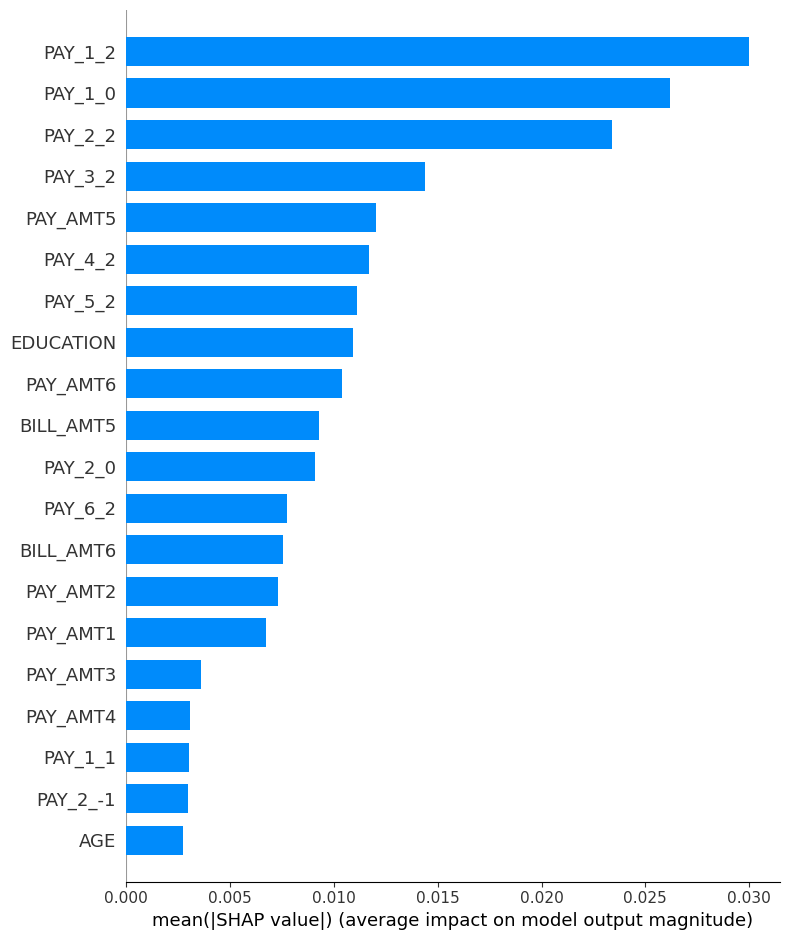

In [105]:
shap_values_class0 = train_shap_values[..., 0]
shap.summary_plot(shap_values_class0, X_train_enc, plot_type="bar")

Above, we can see that a customer's repayment status from the first month the data started to be recorded, specifically if they were delaying their payments by two months or not, tends to be an important feature in default prediction. The second most important feature is whether or not a customer is paying the minimum balance on their bills in the first month the data was recorded. It seems here that the foot the customer gets started off on in terms of repayment status tends to be a large predictor in whether or not they will eventually default (within a 6 month period). I am surprised that the feaures I engineered turned out not to be so relevant in terms of default prediction and the time series data appears to be best for prediction.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

The best performing model we saw, scored by recall, was a ``DecisionTreeClassifier`` with hyper-parameters as given below. I will now evaluate this model on the test set to evaluate its performance on unseen data.

Some of the code below is adapted from Lecture 13.

In [153]:
optimal_model = DecisionTreeClassifier(random_state=random_state,
                            class_weight='balanced',
                            max_depth=10,
                            min_samples_split=3,
                            min_samples_leaf=3)

In [154]:
pipe_optimal = make_pipeline(ct,
                             optimal_model)

In [155]:
pipe_optimal.fit(X_train, y_train)
y_pred = pipe_optimal.predict(X_test)

y_pred = pipe_optimal.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall score:", recall)

Recall score: 0.6319301848049281


Luckily, the test recall score here outperformed the mean CV recall scores from our hyper-parameter optimization. This is a good sign that my model does not suffer from optimization bias and generalizes well to unseen data. I believe that, because my dataset contains large amounts of data, the cross-validation recall scores from earlier and the test score we are faced with now are considerably trustworthy estimates of how my model might perform on deployment data.

In [125]:
X_test_transform = pd.DataFrame(
    data=ct.transform(X_test).toarray(),
    columns=column_names,
    index=X_test.index,
)

In [126]:
X_test_transform.iloc[0]

EDUCATION   -0.982189
AGE         -0.301142
LIMIT_BAL   -0.346448
BILL_AMT1   -0.483970
BILL_AMT2   -0.670657
               ...   
PAY_6_4      0.000000
PAY_6_5      0.000000
PAY_6_6      0.000000
PAY_6_7      0.000000
PAY_6_8      0.000000
Name: 25665, Length: 87, dtype: float64

In [143]:
sample_point = pd.DataFrame(X_test_transform.iloc[0]).T
prediction = optimal_model.predict(sample_point)
print(prediction)

[0]


In [144]:
prediction_prob = optimal_model.predict_proba(sample_point)
print(prediction_prob)

[[0.73891142 0.26108858]]


As we can see, the model predicts the first row in the test set to be a non-default customer with 73.89% confidence. The below waterfall plot summarizes this prediction by the top performing features.

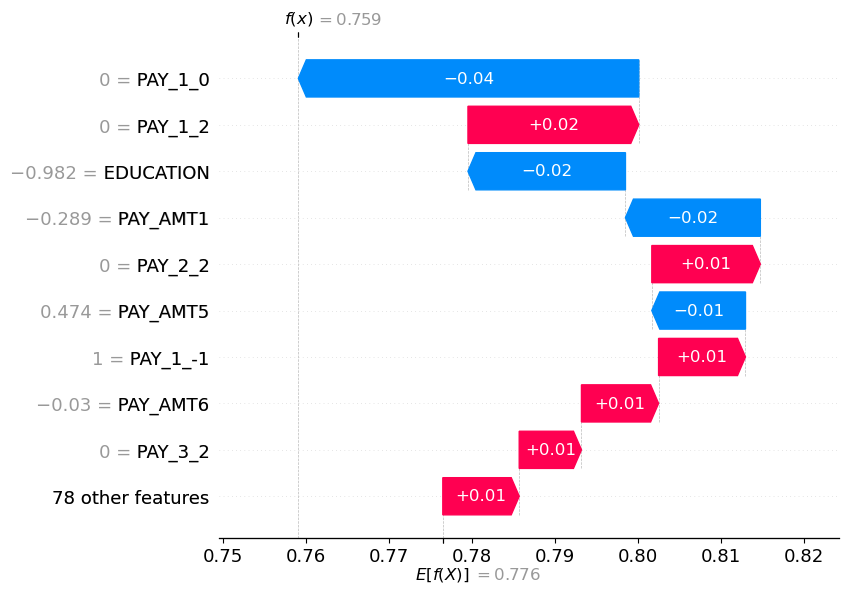

In [146]:
shap.plots.waterfall(test_shap_values[0][:, 0])

As per the above, the whether or not this customer pays their minimum payment on the first month of data collection (Sept 2005) is the most important feature that is driving this observation below the expected value for prediction here. The second most important features are whether or not a customer has a two month delay in repayment in the first month of data collection (Sept 2005) and their education level.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

In [170]:
# find the maximum mean cross_validation score using optimal model
max_mean_cv_score = dt_results.loc["mean_test_score"].max()


max_rank = dt_results.loc["mean_test_score"].idxmax()


max_params = dt_results.loc[:, max_rank]

# Display the results
print("Maximum Mean CV Score:", max_mean_cv_score)
print("Parameters Corresponding to Maximum Mean CV Score:")
print(max_params)

Maximum Mean CV Score: 0.6254184178967944
Parameters Corresponding to Maximum Mean CV Score:
rank_test_score                                          1          1  \
mean_test_score                                   0.625418   0.625418   
param_decisiontreeclassifier__min_samples_split   3.000000   4.000000   
param_decisiontreeclassifier__max_depth          10.000000  10.000000   
param_decisiontreeclassifier__min_samples_leaf    3.000000   3.000000   
mean_fit_time                                     0.886685   0.949493   

rank_test_score                                          1  
mean_test_score                                   0.625418  
param_decisiontreeclassifier__min_samples_split   2.000000  
param_decisiontreeclassifier__max_depth          10.000000  
param_decisiontreeclassifier__min_samples_leaf    3.000000  
mean_fit_time                                     0.829278  


In [171]:
table = {
    'best_model' : [optimal_model],
    'best_min_samples_split' : [3],
    'best_min_samples_leaf' : [3],
    'best_max_depth' : [10],
    'mean_cv_score': [max_mean_cv_score],
    'test_recall_score' : [recall],
    
}

table = pd.DataFrame(table)

table.T

,0
best_model,DecisionTreeClassifier(class_weight='balanced'...
best_min_samples_split,3
best_min_samples_leaf,3
best_max_depth,10
mean_cv_score,0.625418
test_recall_score,0.63193


### Concluding remarks
To conclude, the model that performed best was a ``DecisionTreeClassifier`` with balanced class weight and careful hyper-parameter tuning. The model generalized well to test data, with a final recall that outperformed that of the mean cross-validation score with the training data. 

### Further improvements
To improve the model further I would consider using `KBinsDiscretizer` on the bill and payment amounts to see if this durastically improves my binary classification performance. I may also try less interpretable but more powerful models like `XGBoost` or `CatBoost` for classification to see how they fare in terms of performance on train and test data. 

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

I think my biggest takeaway from the material we have covered so far is the impact that the quality of a data set can have on model performance. It was surprising to see how impactful feature engineering can be on a model's performance, as I thought the type of model and the tuning of its hyper-parameters were more important to model performance than the data itself. I knew that data had to be cleaned and wrangled before it was passed to a machine learning model, but what I didn't understand that new features could be made from the features existing in the data set to substantially increase metrics like accuracy and recall; that is my biggest takeway from the supervised machine learning material we have learned so far.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)